In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("git_dataset.csv")
data["mood"] = data["mood"].str.lower()
data.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,energetic


In [19]:
columns = ["popularity", "length", "danceability", "acousticness", "energy", "instrumentalness", "liveness", "valence", "loudness", "speechiness", "tempo", "key", "time_signature", "mood"]

happy_data = data.loc[data["mood"] == "happy", :][columns].astype(float)
sad_data = data.loc[data["mood"] == "sad", :][columns].astype(float)

energetic_data = data.loc[data["mood"] == "energetic", :][columns].astype(float)
calm_data = data.loc[data["mood"] == "calm", :][columns].astype(float)

happy_sad_data = data[data["mood"].isin(["happy", "sad"])][columns].astype(float)
energetic_calm_data = data[data["mood"].isin(["energetic", "calm"])][columns].astype(float)

histogram_data = data[columns].astype(float)

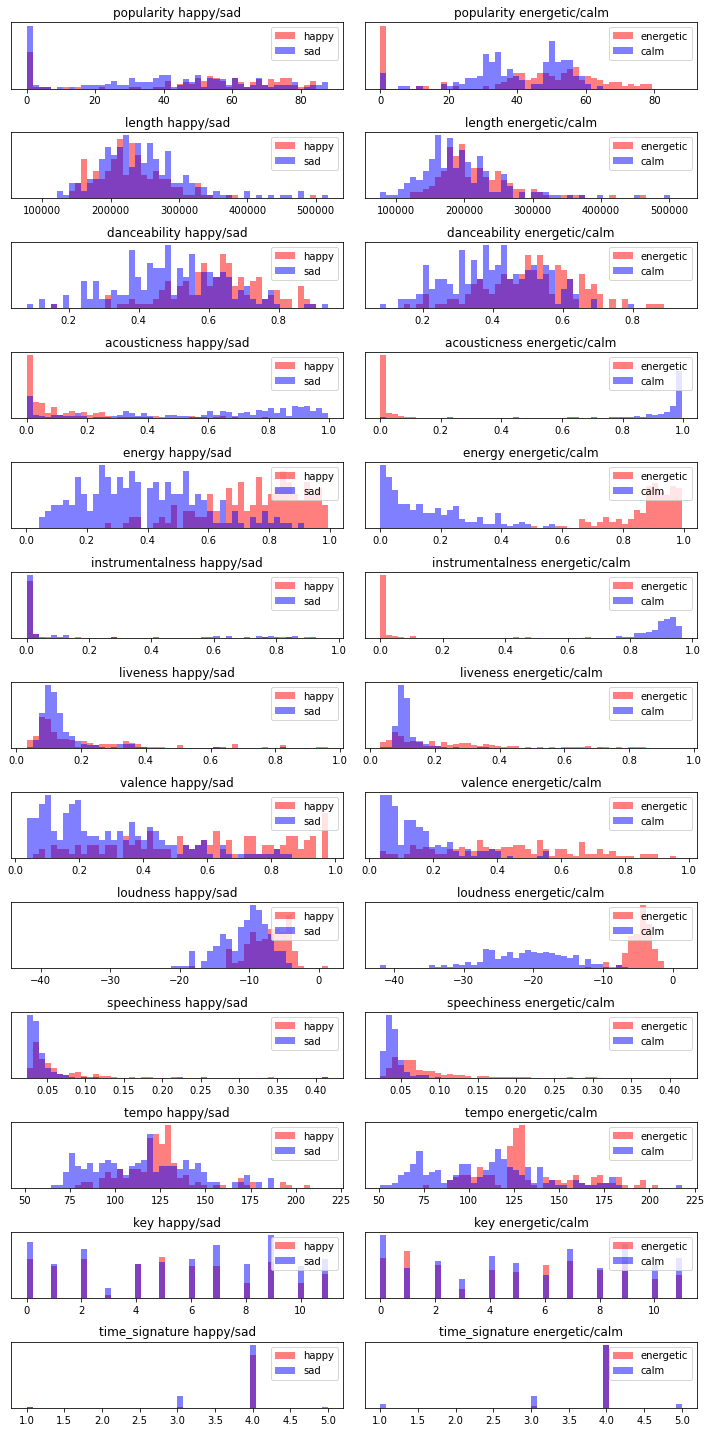

In [18]:
fig, axes = plt.subplots(13, 2, figsize=(10, 20))
ax = axes.ravel() # axes are 2-dimensional so we unfold them
index = 0
for i in range(13):
    _1, bins1 = np.histogram(histogram_data.iloc[:,i], bins=50)
    _2, bins2 = np.histogram(histogram_data.iloc[:,i], bins=50)

    ax[index].hist(happy_data.iloc[:,i], bins=bins1, color='r', alpha=.5, label='happy')
    ax[index].hist(sad_data.iloc[:,i], bins=bins1, color='b', alpha=.5, label='sad')
    ax[index].set_title(happy_sad_data.columns.values[i] + " happy/sad")
    ax[index].set_yticks(()) # remove ticks on y-axis
    ax[index].legend(loc='upper right')

    ax[index+1].hist(energetic_data.iloc[:,i], bins=bins2, color='r', alpha=.5, label='energetic')
    ax[index+1].hist(calm_data.iloc[:,i], bins=bins2, color='b', alpha=.5, label='calm')
    ax[index+1].set_title(energetic_calm_data.columns.values[i] + " energetic/calm")
    ax[index+1].set_yticks(()) # remove ticks on y-axis
    ax[index+1].legend(loc='upper right')

    index += 2

fig.tight_layout()

In [21]:
from matplotlib import cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

X1_corr = happy_sad_data.corr()
X2_corr = energetic_calm_data.corr()
cmap = cm.get_cmap('RdBu', 30)

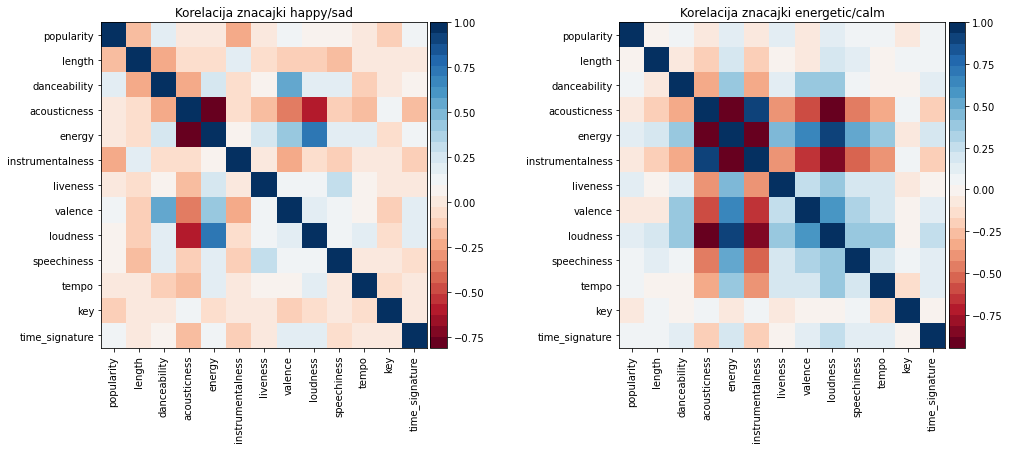

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.ravel()

iax1 = ax[0].imshow(X1_corr, interpolation="nearest", cmap=cmap)
ax[0].grid(False)
ax[0].set(title='Korelacija znacajki happy/sad')
ax[0].set_xticks(range(X1_corr.shape[1]))
ax[0].set_xticklabels(histogram_data.columns.values, rotation=90)
ax[0].set_yticks(range(X1_corr.shape[1]))
ax[0].set_yticklabels(histogram_data.columns.values)
divider = make_axes_locatable(ax[0])
cax1 = divider.append_axes("right", size="5%", pad=0.05)
cbar1 = plt.colorbar(iax1,cax1)

iax2 = ax[1].imshow(X2_corr, interpolation="nearest", cmap=cmap)
ax[1].grid(False)
ax[1].set(title='Korelacija znacajki energetic/calm')
ax[1].set_xticks(range(X1_corr.shape[1]))
ax[1].set_xticklabels(histogram_data.columns.values, rotation=90)
ax[1].set_yticks(range(X1_corr.shape[1]))
ax[1].set_yticklabels(histogram_data.columns.values)
divider = make_axes_locatable(ax[1])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
cbar2 = plt.colorbar(iax2,cax2)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)
fig.set_size_inches(15, 15)
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [34]:
scaler = StandardScaler()
X1 = energetic_calm_data
X2 = happy_sad_data
scaler.fit(X1)
scaler.fit(X2)
X1_scaled = scaler.transform(X1)
X2_scaled = scaler.transform(X2)

pca1 = PCA() # use option n_components=2 to calculate just first two principal components
pca2 = PCA()
pca1.fit(X1_scaled)
pca2.fit(X2_scaled)
X1_pca = pca1.transform(X1_scaled) # transform data onto the principal components
X2_pca = pca2.transform(X2_scaled)

energetic_calm_pca = pd.DataFrame(X1_pca, columns=['PC'+str(i) for i in range(1,X1_pca.shape[1]+1)])
happy_sad_pca = pd.DataFrame(X2_pca, columns=['PC'+str(i) for i in range(1,X2_pca.shape[1]+1)])

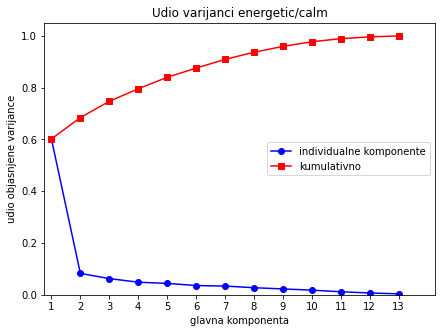

In [37]:
plt.figure(figsize=(7,5))

explained_variance_ratio = pca1.explained_variance_ratio_
explained_variance_ratio_cummulative = np.cumsum(pca1.explained_variance_ratio_)

plt.plot(range(1,X1_pca.shape[1]+1), explained_variance_ratio, '-o', label='individualne komponente', c='b')
plt.plot(range(1,X1_pca.shape[1]+1), explained_variance_ratio_cummulative, '-s', label='kumulativno', c='r')

plt.ylabel('udio objasnjene varijance')
plt.xlabel('glavna komponenta')
plt.xlim(0.75,X1_pca.shape[1]+1.25)
plt.ylim(0,1.05)
plt.xticks(range(1,X1_pca.shape[1]+1))
plt.legend(loc='center right')
plt.title("Udio varijanci energetic/calm")
plt.show()

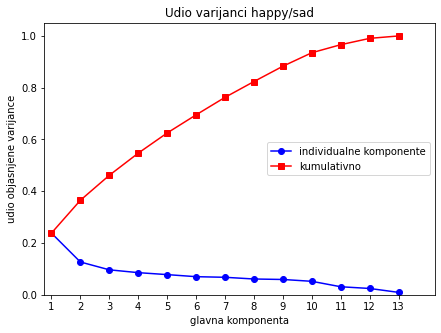

In [38]:
plt.figure(figsize=(7,5))

explained_variance_ratio = pca2.explained_variance_ratio_
explained_variance_ratio_cummulative = np.cumsum(pca2.explained_variance_ratio_)

plt.plot(range(1,X2_pca.shape[1]+1), explained_variance_ratio, '-o', label='individualne komponente', c='b')
plt.plot(range(1,X2_pca.shape[1]+1), explained_variance_ratio_cummulative, '-s', label='kumulativno', c='r')

plt.ylabel('udio objasnjene varijance')
plt.xlabel('glavna komponenta')
plt.xlim(0.75,X2_pca.shape[1]+1.25)
plt.ylim(0,1.05)
plt.xticks(range(1,X2_pca.shape[1]+1))
plt.legend(loc='center right')
plt.title("Udio varijanci happy/sad")
plt.show()

In [41]:
plt.figure(figsize=(5, 5))

plt.scatter(energetic_calm_pca.loc[energetic_calm_pca.loc[:,'mood']==0,'PC1'], 
            energetic_calm_pca.loc[energetic_calm_pca.loc[:,'mood']==0,'PC2'], 
            color='red', marker='.', label='malignant')
plt.scatter(energetic_calm_pca.loc[energetic_calm_pca.loc[:,'mood']==1,'PC1'], 
            energetic_calm_pca.loc[energetic_calm_pca.loc[:,'mood']==1,'PC2'], 
            color='gray', marker='.', label='benign')

plt.legend()
plt.xlabel("prva glavna komponenta")
plt.ylabel("druga glavna komponenta")
plt.show()

KeyError: 'mood'

<Figure size 360x360 with 0 Axes>